In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy.constants import golden
plt.style.use('default')
plt.rc('figure', figsize=((7.0, 7.0 / golden)))

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'ADistance'
wcolors = ['blue', 'orange']
myindex = [
    '7:00', '8:00', '9:00', '10:00',
    '11:00', '12:00', '13:00', '14:00',
    '15:00','16:00', '17:00', '18:00',
    '19:00', '20:00', '21:00', '22:00',
    '23:00']

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]

def heatmap_orario_lunghezza(mezzo):
    data = []

    for lunghezza in range(8, 1, -1):
        riga = []
        for ora in range(7, 24):
            selected = tragitti[
                (tragitti['Hour'] == ora) &
                (tragitti[distance_param] >= float(lunghezza)) &
                (tragitti[distance_param] < float(lunghezza + 1))]
            vmedia_selected = (selected[distance_param] * 60.) / selected[mezzo]
            #riga.append(int(vmedia_selected.mean()))
            riga.append(np.round(vmedia_selected.mean(), 1))
        data.append(riga)


    ore = ['7:00', '8:00', '9:00', '10:00',
        '11:00', '12:00', '13:00', '14:00',
        '15:00','16:00', '17:00', '18:00',
        '19:00', '20:00', '21:00', '22:00',
        '23:00']
    lunghezze = range(8, 1, -1)

    fig, ax = plt.subplots()
    im = ax.imshow(data)

    ax.set_xticks(np.arange(len(ore)))
    ax.set_yticks(np.arange(len(lunghezze)))

    ax.set_xticklabels(ore)
    ax.set_yticklabels(lunghezze)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    for i in range(len(lunghezze)):
        for j in range(len(ore)):
            text = ax.text(j, i, data[i][j],
                ha="center", va="center", color="w")

    ax.set_title("v.media in " + mezzo + " [km/h]")
    fig.tight_layout()
    plt.xlabel('orario')
    plt.ylabel('lunghezza tratta [km]')
    plt.show()

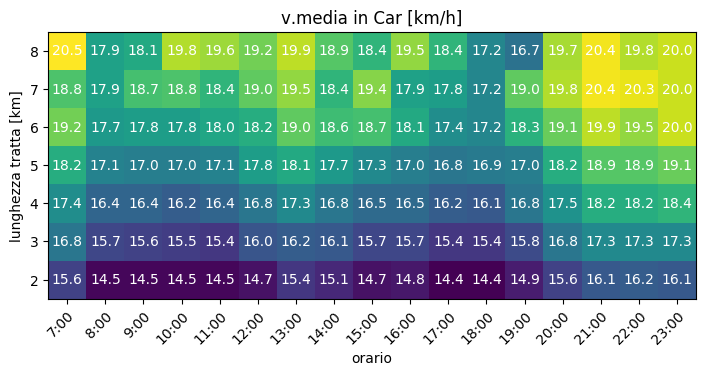

In [3]:
heatmap_orario_lunghezza('Car')

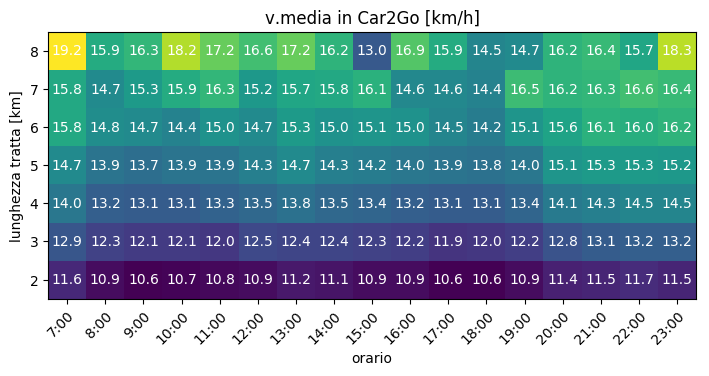

In [4]:
heatmap_orario_lunghezza('Car2Go')

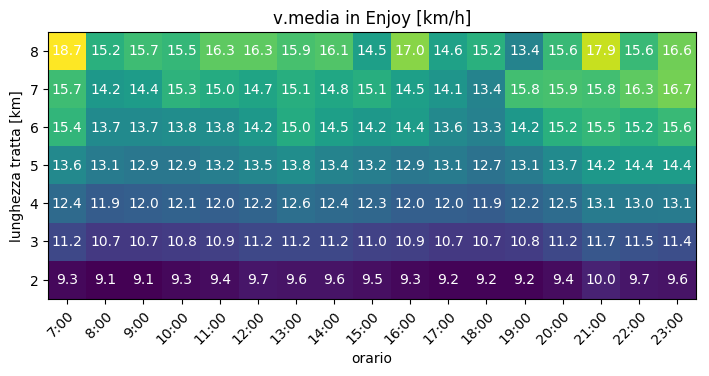

In [5]:
heatmap_orario_lunghezza('Enjoy')

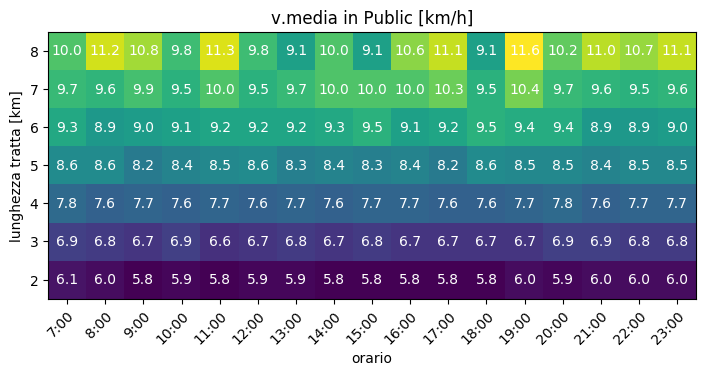

In [6]:
heatmap_orario_lunghezza('Public')

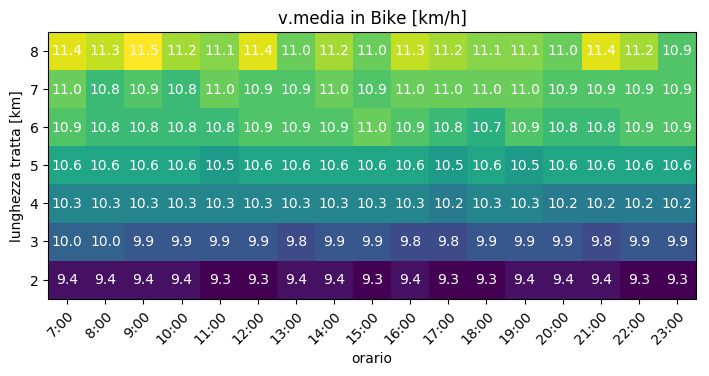

In [7]:
heatmap_orario_lunghezza('Bike')